In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
housing_data = pd.read_csv('Data_Files/housing.csv')
housing_data.head()
#Median Income is expressed in 10k dollars, so 8.3252 = $83,252
#Median House Value is target for prediction

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [57]:
housing_data.sample(20) #"sample" function is a better representation of data peek since it is randomized

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
1118,-121.57,39.80,23,790,137.0,365,152,2.1912,115200,INLAND
1590,-122.10,37.93,20,10212,1424.0,4083,1374,8.0390,382200,NEAR BAY
932,-122.05,37.54,25,4209,731.0,2568,703,5.2882,223100,NEAR BAY
1757,-122.33,37.95,42,1627,336.0,848,316,3.7708,144600,NEAR BAY
1124,-121.58,39.76,18,1676,332.0,733,318,1.7875,103800,INLAND
1068,-121.85,39.73,17,3425,827.0,2469,758,0.9393,88900,INLAND
870,-121.93,37.49,5,1150,311.0,648,245,3.5714,300000,<1H OCEAN
564,-122.24,37.75,27,4051,753.0,1499,797,4.8711,286600,NEAR BAY
2074,-119.82,36.75,41,1022,209.0,741,213,2.0781,48800,INLAND
861,-121.98,37.58,20,4126,1031.0,2079,975,3.6832,216900,<1H OCEAN


In [58]:
housing_data.shape

(2382, 10)

In [59]:
#drops all records that have misssing fields
housing_data = housing_data.dropna()

In [60]:
housing_data.shape #drops 17 records

(2365, 10)

In [61]:
#Brings up basic stats for all columsn w/ numerical values
housing_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,2365.000000,2365.000000,2365.000000,2365.000000,2365.000000,2365.000000,2365.000000,2365.000000,2365.000000
mean,-121.591869,37.854317,30.439746,2568.643129,499.749683,1253.483721,465.936998,3.760309,176114.810994
std,0.959362,0.791558,14.041524,2026.388413,369.191658,941.711595,347.854628,1.880669,97997.363089
min,-124.300000,33.330000,2.000000,12.000000,4.000000,18.000000,7.000000,0.499900,22500.000000
25%,-122.210000,37.660000,18.000000,1435.000000,284.000000,713.000000,266.000000,2.419600,97700.000000
50%,-122.040000,37.810000,30.000000,2085.000000,408.000000,1027.000000,379.000000,3.344700,157400.000000
75%,-121.520000,37.970000,42.000000,3046.000000,597.000000,1500.000000,548.000000,4.762200,226700.000000
max,-118.320000,41.950000,52.000000,28258.000000,3864.000000,12203.000000,3701.000000,15.000100,500001.000000


In [62]:
housing_data['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

Text(0, 0.5, 'Median House Value')

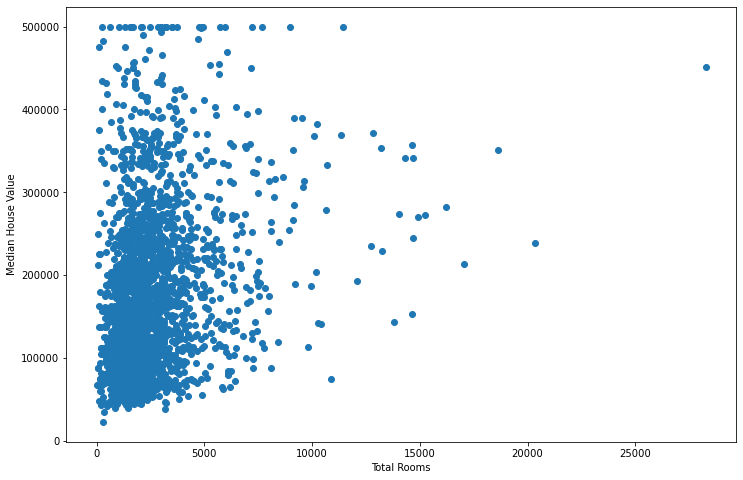

In [63]:
fig, ax = plt.subplots(figsize=(12,8))

plt.scatter(housing_data['total_rooms'], housing_data['median_house_value'])

plt.xlabel('Total Rooms')
plt.ylabel('Median House Value') #w/ larger dataset, cap would be 500,001 dollars.

Text(0, 0.5, 'Median House Value')

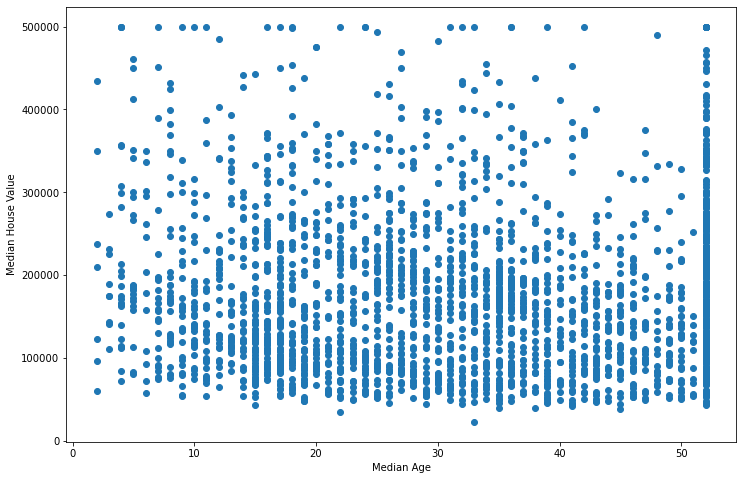

In [64]:
fig, ax = plt.subplots(figsize=(12,8))

plt.scatter(housing_data['housing_median_age'], housing_data['median_house_value'])

plt.xlabel('Median Age') #Take a look at the cap at median age (52)
plt.ylabel('Median House Value')

Text(0, 0.5, 'Median House Value')

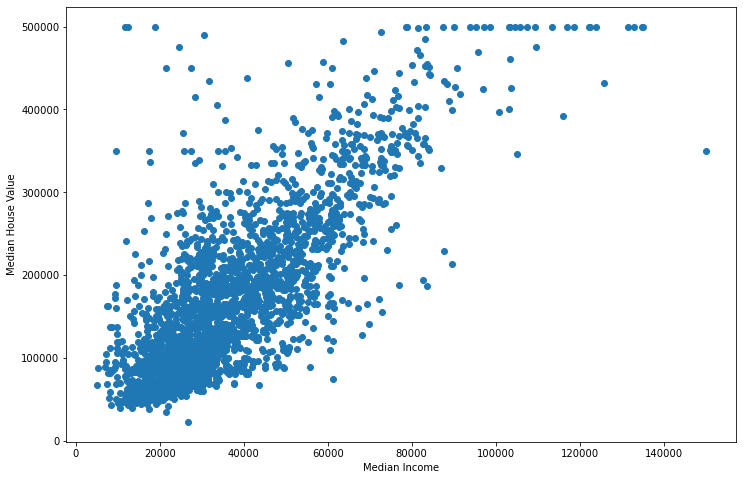

In [65]:
fig, ax = plt.subplots(figsize=(12,8))

plt.scatter(housing_data['median_income']*10000, housing_data['median_house_value']) #converting median income back to actual dollar amount

plt.xlabel('Median Income')
plt.ylabel('Median House Value')

This scatter plot is showing a clear upward flow relationship b/w home values and income. So when income rises, so does the purchase of more expensive homes.

In [66]:
housing_data_corr = housing_data.corr()
housing_data_corr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.459572,-0.287009,-0.014034,-0.013126,-0.006238,-0.046821,-0.175422,-0.406489
latitude,-0.459572,1.000000,-0.100072,0.008128,0.009492,-0.049793,-0.016837,-0.083599,-0.044039
housing_median_age,-0.287009,-0.100072,1.000000,-0.392386,-0.352901,-0.348007,-0.328244,-0.234732,-0.008908
total_rooms,-0.014034,0.008128,-0.392386,1.000000,0.931368,0.919690,0.930066,0.301845,0.263851
total_bedrooms,-0.013126,0.009492,-0.352901,0.931368,1.000000,0.917200,0.985731,0.075516,0.118238
population,-0.006238,-0.049793,-0.348007,0.919690,0.917200,1.000000,0.936520,0.142752,0.116467
households,-0.046821,-0.016837,-0.328244,0.930066,0.985731,0.936520,1.000000,0.105754,0.139991
median_income,-0.175422,-0.083599,-0.234732,0.301845,0.075516,0.142752,0.105754,1.000000,0.772102
median_house_value,-0.406489,-0.044039,-0.008908,0.263851,0.118238,0.116467,0.139991,0.772102,1.000000


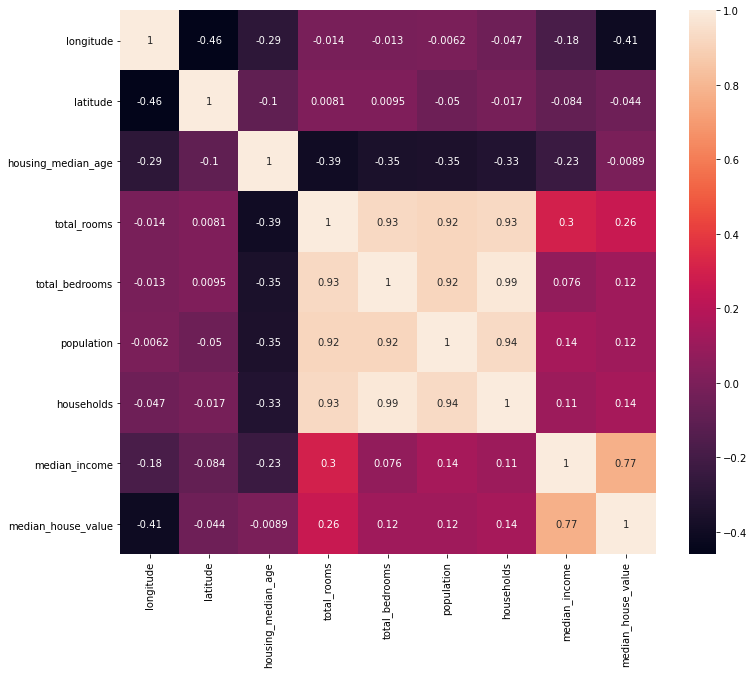

In [67]:
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(housing_data_corr,annot=True)

### Regression Models used to predict w/ continuous data (stock prices, car prices)
#### - The "best fit" line is the one where the sum of the squares of the lengths of the distances on the plot from the line(s) (or "errors") are the most minimum (aka min value for the least square errors)
#### - Use the square to eliminate negative values
### Classification used to predict categorical data (what is this image of, what is the type)

In [68]:
housing_data.sample(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
158,-122.23,37.81,52,2814,365.0,878,352,7.5080,348700,NEAR BAY
536,-122.28,37.79,30,4145,869.0,3668,855,2.5444,275000,NEAR BAY
700,-122.03,37.69,20,200,25.0,83,31,6.5000,340000,NEAR BAY
278,-122.19,37.79,50,954,217.0,546,201,2.6667,172800,NEAR BAY
2279,-119.78,36.78,31,2164,456.0,959,463,2.3293,73400,INLAND
2309,-119.74,36.83,14,4675,829.0,2235,787,4.1098,108200,INLAND
699,-122.12,37.69,10,2227,560.0,1140,472,2.3973,167300,NEAR BAY
2077,-119.81,36.76,48,2059,388.0,834,405,2.9306,67900,INLAND
373,-122.16,37.75,44,617,131.0,378,135,2.5568,111100,NEAR BAY
2120,-119.73,36.75,39,1745,321.0,901,303,3.1719,67900,INLAND


In [69]:
#Determine how many records have this med house value
housing_data.loc[housing_data['median_house_value']==500001].count()

longitude             28
latitude              28
housing_median_age    28
total_rooms           28
total_bedrooms        28
population            28
households            28
median_income         28
median_house_value    28
ocean_proximity       28
dtype: int64

### In the original dataset there are a lot of records (958) that have this top median house value of 500001. It would be a good idea to "DROP" these records to get rid of the skewing.

In [70]:
#This command below will drop all records (10 of them in current dataset) that contain mhv of 500001
housing_data = housing_data.drop(housing_data.loc[housing_data['median_house_value']== 500001].index)

In [71]:
housing_data.shape

(2337, 10)

In [72]:
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [73]:
housing_data['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

## The one column in this dataset that uses strings (Ocean Proximity) negates the Machine Learning ability since ML needs numbers. You would need to use "one hot encoding" to translate these string values into numerical ones

In [74]:
#pd.get_dummies converts to one hot form
housing_data = pd.get_dummies(housing_data, columns=['ocean_proximity'])

In [75]:
housing_data.shape

(2337, 14)

In [76]:
housing_data.sample(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
1935,-120.99,38.67,8,4913,744.0,2005,723,5.4413,187900,0,1,0,0,0
1241,-121.91,39.03,48,1096,218.0,657,199,2.7841,65800,0,1,0,0,0
378,-122.17,37.74,34,1223,281.0,824,280,2.2917,92500,0,0,0,1,0
854,-122.01,37.59,2,838,295.0,240,149,2.8750,237500,0,0,0,1,0
1741,-122.33,37.96,46,1222,236.0,819,251,3.9118,129400,0,0,0,1,0
1805,-122.33,37.93,27,2158,424.0,1220,442,3.0156,111500,0,0,0,1,0
643,-122.14,37.73,43,2264,390.0,931,368,3.8125,235100,0,0,0,1,0
495,-122.25,37.86,52,4048,663.0,1316,590,5.3794,376900,0,0,0,1,0
2347,-119.68,36.80,7,2855,518.0,1748,498,4.2066,88400,0,1,0,0,0
898,-121.96,37.53,18,2375,652.0,1252,586,2.6198,235900,1,0,0,0,0


In [77]:
X = housing_data.drop('median_house_value', axis=1) #this is the feature we are using to Train the model. all columns in the model will be used BESIDES the median house value
Y = housing_data['median_house_value']  #this is the determinant or prediction

In [78]:
X.columns #displays all the features/data points that will be used in the model training

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

### To begin training your model, you should split data into Test set and Training set

In [79]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2) #this is a 80/20 train/test split

#### ML models tend to be built on 80/20 or 70/30 train/test data parsing split

In [80]:
x_train.shape, x_test.shape

((1869, 13), (468, 13))

In [81]:
y_train.shape, y_test.shape

((1869,), (468,))

### Building Linear Regression model
#### Sci-Kit Learn has a library of linear regression models. We are importing them before executing the model
#### Normalization scales all numeric features to be b/w 0 and 1. Having features in the same scale can vastly improve the performance of your ML Model
#### Fit trains the linear model using our features and target values (X & Y)

In [82]:
#This will kick off the training. The larger the dataset, the longer it will take.
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression(normalize=True).fit(x_train,y_train)

In [83]:
print("Training_score:", linear_model.score(x_train,y_train))

Training_score: 0.7410161575135226


### The score above is a score in terms of R-Square
#### R-Square is a measure of how well our linear model captures the underlying variation in our training data. R-Square is specific to Linear modelling
#### A Training score of .74101615 means that our model capture 74.10% of the variation in our training data. This is pretty decent.

In [85]:
predictors = x_train.columns
predictors

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [86]:
#The model calculated a coefficient, or WEIGHT, for each feature in our model (i.e. how much did the feature contribute twds the prediction?)
coef = pd.Series(linear_model.coef_,predictors).sort_values()
print(coef)

ocean_proximity_NEAR OCEAN   -3.438032e+18
ocean_proximity_INLAND       -3.438032e+18
ocean_proximity_NEAR BAY     -3.438032e+18
ocean_proximity_<1H OCEAN    -3.438032e+18
ocean_proximity_ISLAND       -3.438032e+18
longitude                    -1.846426e+04
latitude                     -5.334702e+03
population                   -2.764161e+01
households                    1.416264e+00
total_rooms                   4.115978e+00
total_bedrooms                6.463353e+01
housing_median_age            4.803877e+02
median_income                 3.658760e+04
dtype: float64


#### Neg values imputedly indicate the features that LOWER the price of the house, whereas the positive features increase the price of the house
#### Original data, Ocean_proximity_ISland, Median_Income are the highest pos values

In [87]:
y_pred = linear_model.predict(x_test)

In [88]:
#Would prob need a larger dataset to get better scoring, but this isn't too bad
df_pred_actual = pd.DataFrame({'predicted':y_pred,'actual':y_test})
df_pred_actual.head(10)

,predicted,actual
1281,108032.0,105100
2158,113664.0,72200
1901,94720.0,107800
1516,244736.0,226000
1769,181248.0,111700
1142,84992.0,111200
1945,193536.0,196300
409,438272.0,397000
1472,201728.0,171000
1397,236544.0,197100


In [89]:
from sklearn.metrics import r2_score #very useful and has many different scoring algorithms
print("Testing_score:", r2_score(y_test,y_pred))  #checking r2 scoring predicted values from our model to actual values from dataset

Testing_score: 0.6955782663378458


#### Model performs as well as new instances and training data. In this case, it performed slightly below at 69.56% compared to the original score of 74.10%

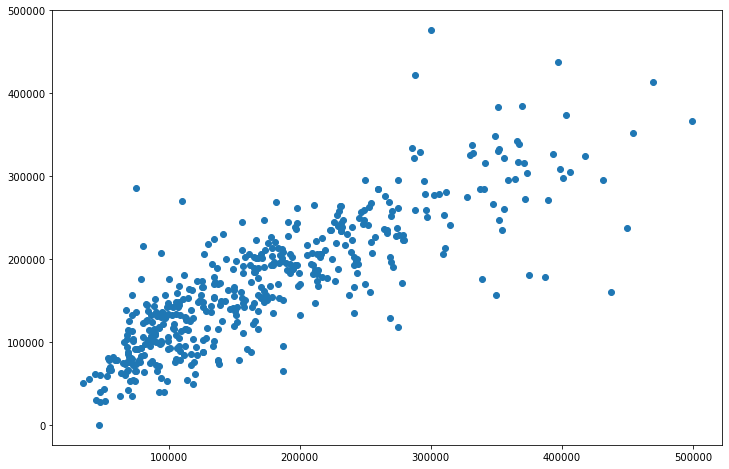

In [90]:
#Use a scatter plot to visualize actual values against predicted values from your model
fig, ax = plt.subplots(figsize=(12,8))

plt.scatter(y_test,y_pred)
plt.show()

In [91]:
#taking a look a sampling of the data
df_pred_actual_sample = df_pred_actual.sample(100)
df_pred_actual_sample = df_pred_actual_sample.reset_index() #Will start back at 0

In [92]:
df_pred_actual_sample.head(10)

,index,predicted,actual
0,1280,113152.0,109400
1,114,197632.0,243100
2,533,206336.0,215300
3,539,132608.0,102200
4,1498,326144.0,330200
5,2022,50176.0,34400
6,1424,110592.0,156300
7,123,271872.0,389500
8,697,160256.0,155200
9,2319,65536.0,68200


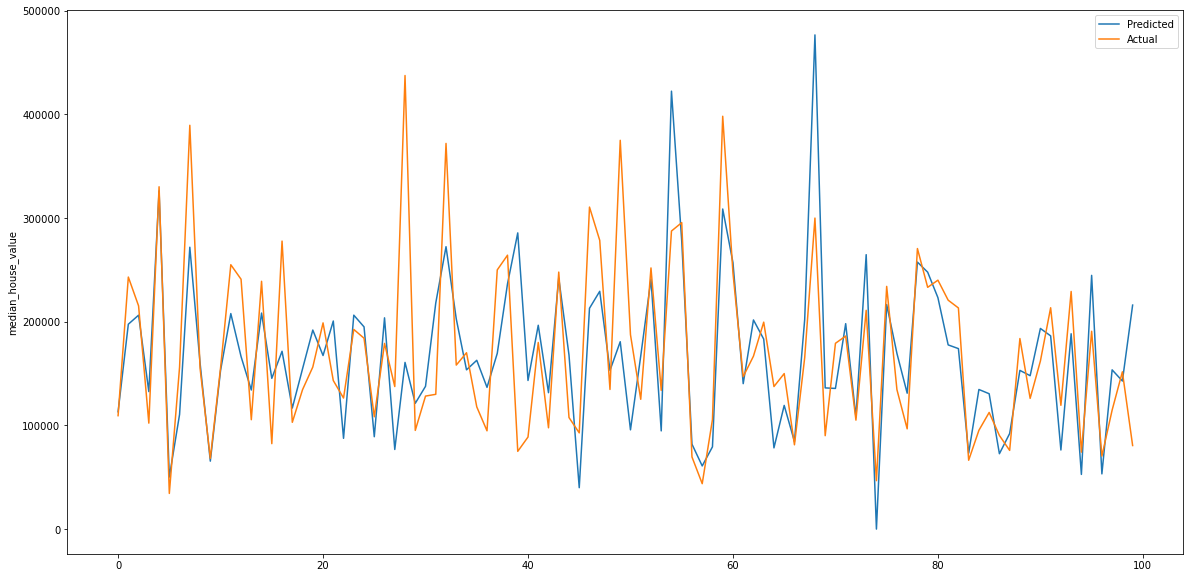

In [93]:
plt.figure(figsize=(20,10))

plt.plot(df_pred_actual_sample['predicted'],label='Predicted')
plt.plot(df_pred_actual_sample['actual'],label='Actual')

plt.ylabel('median_house_value')

plt.legend()
plt.show()